In [5]:
import sys
!{sys.executable} -m pip install xgboost

In [6]:
pip install holidays

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import calendar
from datetime import date
import holidays

In [8]:
df = pd.read_csv('day.csv')
df.head()

,instant,datetime,season,year,month,holidays,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
shape=df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   datetime    731 non-null    object 
 2   season      731 non-null    int64  
 3   year        731 non-null    int64  
 4   month       731 non-null    int64  
 5   holidays    731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weather     731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  humidity    731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  count       731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,year,month,holidays,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
shape=df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   datetime    731 non-null    object 
 2   season      731 non-null    int64  
 3   year        731 non-null    int64  
 4   month       731 non-null    int64  
 5   holidays    731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weather     731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  humidity    731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  count       731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,year,month,holidays,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
parts = df["datetime"].str.split(" ", n=2, expand=True)
df["datetime"] = parts[0]
df.head()

,instant,datetime,season,year,month,holidays,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [12]:
parts = df["datetime"].str.split("-", n=3, expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')
df.head()

,instant,datetime,season,year,month,holidays,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,1,01-01-2011,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,02-01-2011,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,3,03-01-2011,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,4,04-01-2011,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,5,05-01-2011,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


In [13]:
def weekend_or_weekday(year, month, day):
	d = datetime(year, month, day)
	if d.weekday() > 4:
		return 0
	else:
		return 1


In [14]:
df['weekday'] = df.apply(lambda x:weekend_or_weekday(x['year'],x['month'],x['day']),axis=1)
df.head()

,instant,datetime,season,year,month,holidays,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,1,01-01-2011,1,2011,1,0,0,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,02-01-2011,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,3,03-01-2011,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,4,04-01-2011,1,2011,1,0,1,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,5,05-01-2011,1,2011,1,0,1,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


In [15]:
def is_holiday(x):

	india_holidays = holidays.country_holidays('IN')

	if india_holidays.get(x):
		return 1
	else:
		return 0


In [16]:
df['holidays'] = df['datetime'].apply(is_holiday)
df.head()

,instant,datetime,season,year,month,holidays,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,1,01-01-2011,1,2011,1,0,0,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,02-01-2011,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,3,03-01-2011,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,4,04-01-2011,1,2011,1,0,1,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,5,05-01-2011,1,2011,1,1,1,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


In [17]:
df.drop(['datetime',],axis=1,inplace=True)
df.head()

,instant,season,year,month,holidays,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,1,1,2011,1,0,0,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,3,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,4,1,2011,1,0,1,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,5,1,2011,1,1,1,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


In [18]:
df.isnull().sum()

instant       0
season        0
year          0
month         0
holidays      0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
day           0
dtype: int64

In [21]:
features = ['month']

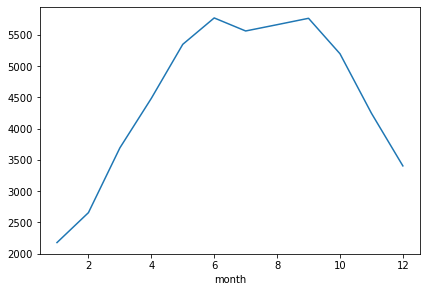

In [22]:
plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
	plt.subplot(2, 2, i + 1)
	df.groupby(col).mean()['count'].plot()
plt.show()

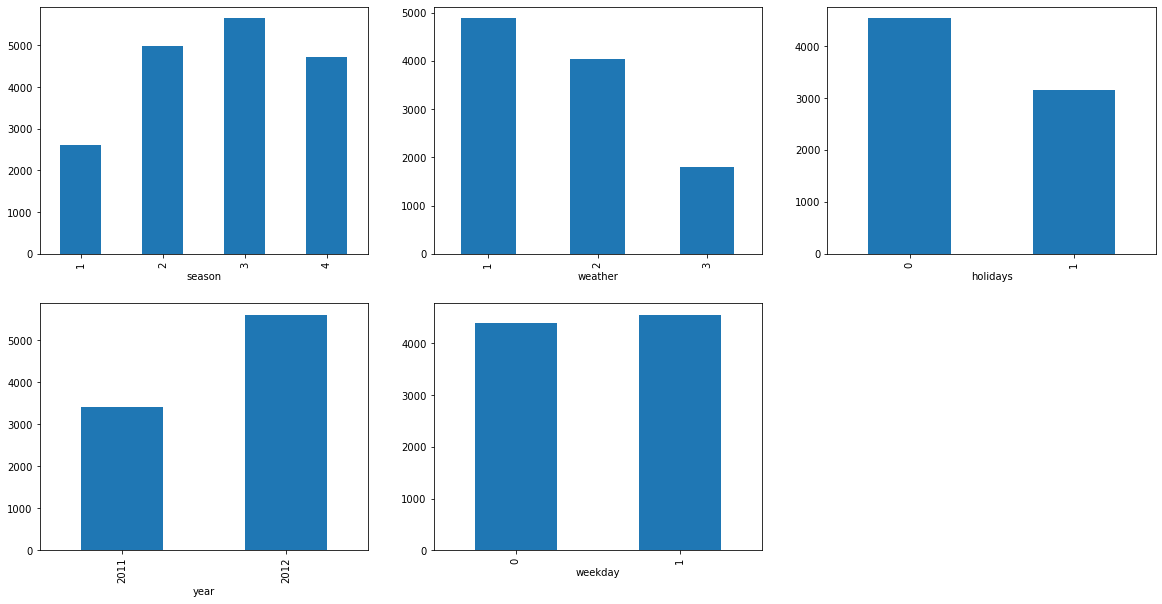

In [23]:
features = ['season', 'weather', 'holidays','year', 'weekday']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(2, 3, i + 1)
	df.groupby(col).mean()['count'].plot.bar()
plt.show()

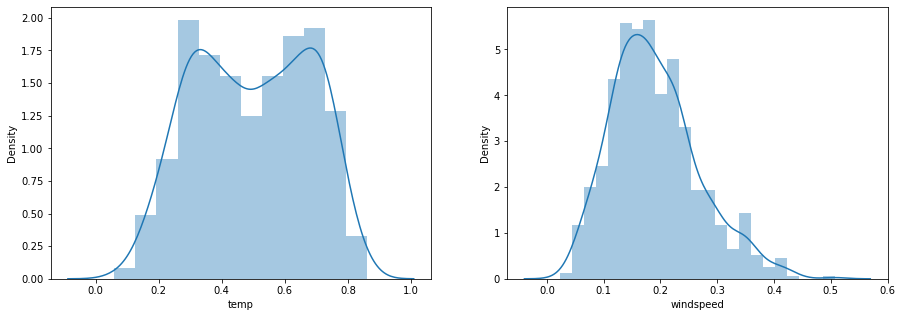

In [24]:
features = ['temp', 'windspeed']

plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sb.distplot(df[col])
plt.show()

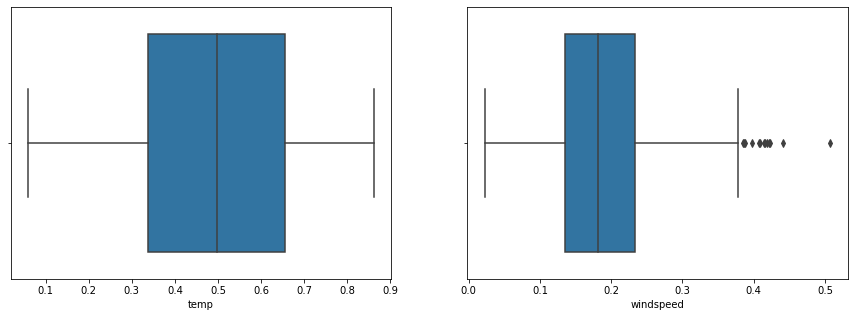

In [25]:
features = ['temp', 'windspeed']

plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sb.boxplot(df[col])
plt.show()

In [26]:
num_rows = df.shape[0] - df[df['windspeed']<32].shape[0]
print(f'Number of rows that will be lost if we remove outliers is equal to {num_rows}.')

Number of rows that will be lost if we remove outliers is equal to 0.


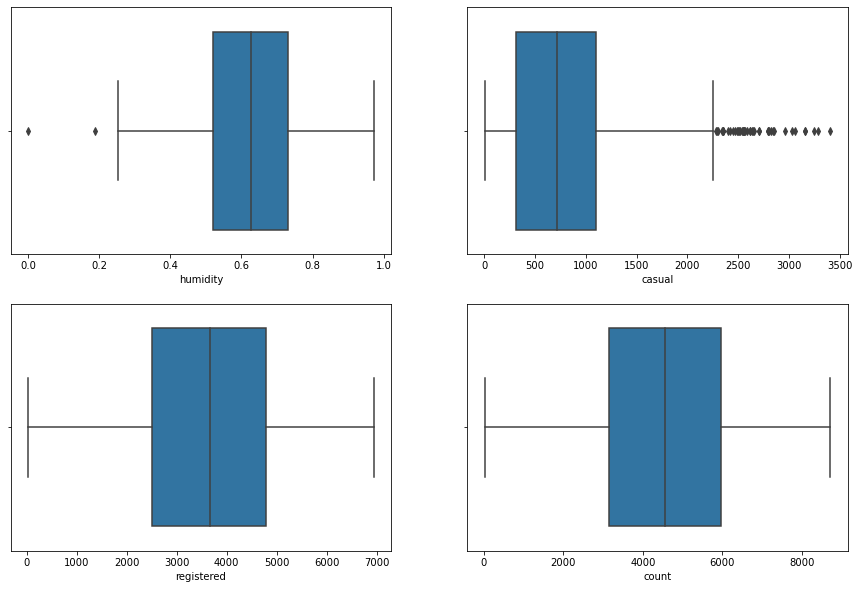

In [27]:
features = ['humidity', 'casual', 'registered', 'count']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sb.boxplot(df[col])
plt.show()

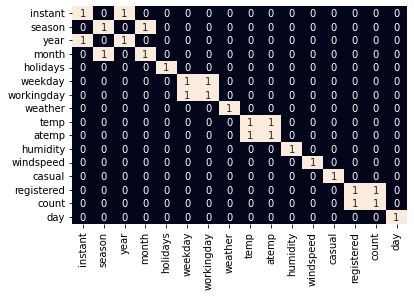

In [28]:
sb.heatmap(df.corr() > 0.8,annot=True,cbar=False)
plt.show()

In [29]:
df.drop(['registered'], axis=1, inplace=True)
df = df[(df['windspeed'] < 32) & (df['humidity'] > 0)]
features = df.drop(['count'], axis=1)
target = df['count'].values
df.head()

,instant,season,year,month,holidays,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,count,day
0,1,1,2011,1,0,0,0,2,0.344167,0.363625,0.805833,0.160446,331,985,1
1,2,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,801,2
2,3,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1349,3
3,4,1,2011,1,0,1,1,1,0.200000,0.212122,0.590435,0.160296,108,1562,4
4,5,1,2011,1,1,1,1,1,0.226957,0.229270,0.436957,0.186900,82,1600,5


In [30]:
X_train, X_val, Y_train, Y_val = train_test_split(features,target,test_size = 0.1,random_state=22)
print(X_train.shape, X_val.shape)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

(657, 14) (73, 14)


In [32]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(), Lasso(),RandomForestRegressor(), Ridge()]

In [33]:
for i in range(5):
	models[i].fit(X_train, Y_train)

	print(f'{models[i]} : ')

	train_preds = models[i].predict(X_train)
	print('Training Error : ', mae(Y_train, train_preds))

	val_preds = models[i].predict(X_val)
	print('Validation Error : ', mae(Y_val, val_preds))
	print()

LinearRegression() : 
Training Error :  471.59432421294855
Validation Error :  507.1428704051535

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...) : 
Training Error :  7.528764806018754
Validation Error :  346.4679222629495

Lasso() : 
Training Error :  472.9170003439712
Validation Error :  497.5230563613014

RandomForestRegressor() : 
Trainin

In [34]:
val_preds = models[3].predict(X_val)
val_preds

array([2780.89, 7436.31, 2457.53, 5705.59, 4566.38, 3804.46, 1338.41,
       1823.82, 2486.85, 4256.54, 4829.18, 3041.64, 3177.89, 6529.22,
       3774.38, 4396.09, 1722.29, 3831.15, 3898.11, 6321.25, 1414.68,
       3946.77, 6914.59, 3649.46, 7765.34, 5235.85, 3826.16, 5106.57,
       4087.09, 4010.14, 5834.12, 4070.4 , 3991.27, 3038.4 , 4425.37,
       2947.54, 7929.95, 4677.9 , 4410.29, 3841.73, 2135.11, 4731.6 ,
       5098.59, 4466.79, 4298.76, 6396.34, 6024.84, 6834.91, 2286.7 ,
       5040.27, 6585.42, 5754.12, 2190.49, 7175.59, 5868.94, 3908.34,
       2331.4 , 8040.53, 6974.26, 4821.82, 5005.99, 4241.4 , 6955.94,
       4079.87, 4717.95, 4797.14, 3403.47, 4519.44, 3063.64, 3898.52,
       6313.32, 4699.3 , 5281.98])

In [35]:
train_preds = models[3].predict(X_train)


Text(0, 0.5, 'Predictions')

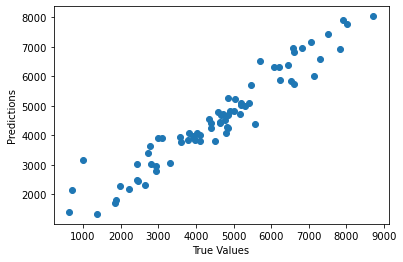

In [36]:
plt.scatter(Y_val, val_preds)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [ ]:
models[3].score(X_val, Y_val)

In [39]:
for i in range(5):
    models[i].fit(X_train, Y_train)
    print(f'{models[i]} : ')
    print('score:', models[i].score(X_val, Y_val))


LinearRegression() : 
score: 0.8588748964578496
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...) : 
score: 0.9342839933689902
Lasso() : 
score: 0.8645907035078849
RandomForestRegressor() : 
score: 0.9176294678656121
Ridge() : 
score: 0.8629785006457908
